# Install and Set Up Kaggle and API Key

Follow these steps to install and configure the Kaggle API on your system:

1. **Create a Kaggle Account**
   - Visit [Kaggle](https://www.kaggle.com) and sign up for an account.

2. **Obtain Kaggle API Key**
   - Go to your Kaggle account settings.
   - Find the "API" section and click on "Create New API Token".
   - This will download a `kaggle.json` file containing your API key.

3. **Install Kaggle Package**
   - Use Conda to install the Kaggle package by running:
     ```bash
     conda install kaggle
     ```

4. **Configure API Key**
   - Copy the `kaggle.json` file to your user directory under the `.kaggle` folder. On most systems, you can use the following command:
     ```bash
     mkdir -p ~/.kaggle
     cp path_to_downloaded_kaggle.json ~/.kaggle/kaggle.json
     chmod 600 ~/.kaggle/kaggle.json
     ```
   - Ensure the `.kaggle` directory and the `kaggle.json` file have the proper permissions by setting:
     ```bash
     chmod 600 ~/.kaggle/kaggle.json
     ```


In [1]:
import pandas as pd
import kaggle
import Marketing_Campaign as mc
# Pre processing
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
import numpy as np


# Scoring 
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA

# models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.pipeline import make_pipeline as make_imbalance_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor


# import Dataset

In [2]:
# Get the data using an API call
kaggle.api.dataset_download_files('rodsaldanha/arketing-campaign', path='resources', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign


In [3]:
# Import the data
data = pd.read_csv("./resources/marketing_campaign.csv",delimiter=';')


# EDA (Exploratory Data Analysis)
We will revisit this. For now We want the rough draft of the model
#
During EDA

Visualize the data using plots and graphs to understand distributions and relationships between variables.
Calculate summary statistics to get a sense of the central tendencies and variability.
Identify any correlations between variables that might influence model choices.
Detect and treat missing values or outliers that could skew the results of your analysis.
Explore the data's structure to inform feature selection and engineering, which are key to building effective machine learning models.

# Read any and all documentation you can find on your dataset to understand it better


In [4]:
display (data.head())
# what does our data look like? At this point also use any documentation on the data set to find out what each value means and how it might be used is solving the business problem
print (f'{data.shape}\n')
print (data.columns)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


(2240, 29)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


# We are going through 5 steps to clean the dataset
- data1: Autodrop NA when the na % is less than 2% 
- data2: Encode education
- data3: Set Generation from birth year
- data4: Convert dt_customer from date to lenght in months
- data5: One Hot Encode Marital Status and Education
- data6: Drop ID and Year Birth

In [5]:
# test dropping some columns
# data.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [6]:
# Preprocess = Clean up NA if number of NA in column is less that a percentage of rows
# this automatically cleans up rows below a threshold and list columns when NA rows exceed the threshold

data1=mc.auto_drop_na(data,2)


Drop Percent of the rows is %2
If the number of NA values in a column is less than the calculated threshold, automatically drop the NA rows.
{'Income': 24}
Automatically dropping rows in Income where NA values are present.


In [7]:
# Identify non numeric columns we will need to deal with
non_numeric= (data1.dtypes[(data1.dtypes != 'int64') & (data1.dtypes != 'float64')]).index.tolist()
# display (data.dtypes)
print (f'Columns that are not numeric :\n {non_numeric}\n')

for column in non_numeric:
    print (data1[column].value_counts())
    print ('\n')

Columns that are not numeric :
 ['Education', 'Marital_Status', 'Dt_Customer']

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Dt_Customer
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2014-05-09     1
2013-06-26     1
2014-01-09     1
Name: count, Length: 662, dtype: int64




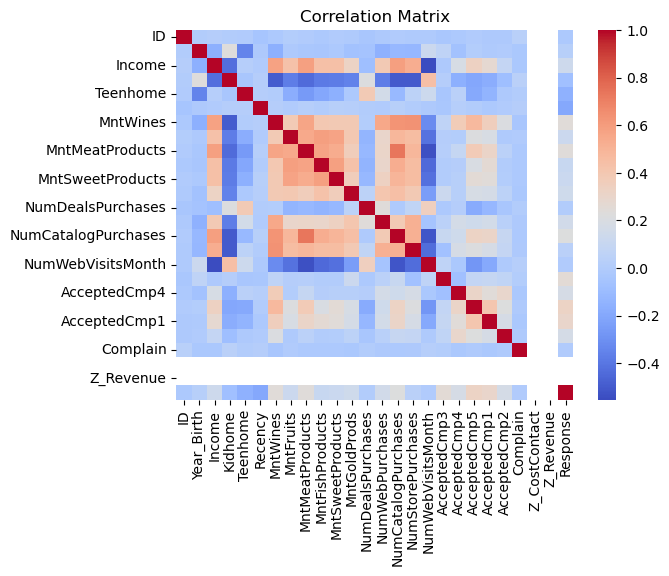

In [8]:
coor1=data1.drop(non_numeric,axis=1)
correlation_matrix = coor1.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Numeric data to group
The year of birth data creates too many unique data to be useful. We have chosen to convert the Year Birth data to a 6 generation values. After one hot encode for generation we drop the year birth column. 

# non numeric column 
- Education OrdinalEncoder because education counts
     - 0 - **Basic** This generally refers to elementary or primary education.
     - 1 - **2n Cycle** This is not a commonly used term globally but might refer to secondary education or an intermediary level in some education systems.
     - 2 - **Graduation** Typically refers to the completion of a bachelor's or undergraduate degree.
     - 3 - **Master** A postgraduate degree that follows the completion of a bachelor's degree.
     - 4 - **PhD** The highest university degree, typically following a master's degree.

- Marital_Status - The status has no weighted values. change none standard answers to single and then one hot encode three remaining values
     - Alone     Single
     - Absurd    Single
     - YOLO      Single

- Year_Birth - Convert to 6 generations and then One Hot Encode

- Dt_Customer - We will convert to data time and represent this in number of months the cusomter has been with us

# ID column
The id column is etiher a uniwue customer id or an index falue that became a column in the past

In [9]:
# Education encode
categories = ['Basic','2n Cycle','Graduation','Master','PhD']
column = 'Education'
data2 = mc.preprocess_ord(data1,column,categories)

# One Hot ENncode
We want to One Hot Encode Marital Status and Generations.
This takes some preperation
-- Marital needs to change Alone, Absurd and YOLO to Single. 
-- Year_Birth needs to be encoded as generations first

In [10]:
# Marital Status Encode
data2['Marital_Status'] = data2['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
# transform Year_Birth to Generations
data3 = mc.set_gen(data2,'Year_Birth')
data4 = mc.date_to_months(data3,'Dt_Customer',2024)
ohe_column_list = ['Marital_Status', 'Generations']
data5 = mc.preprocess_ohe(data4,ohe_column_list)


In [11]:
# Identify columns with only one unique value
single_value_columns = data5.nunique() == 1
# Drop these columns from the DataFrame
data5 = data5.loc[:, ~single_value_columns]
data6 = data5.drop(['ID','Year_Birth'],axis=1)


In [12]:
# Pick a y column
y_value='Response'

# Evaluating Corrilation and Imbalance

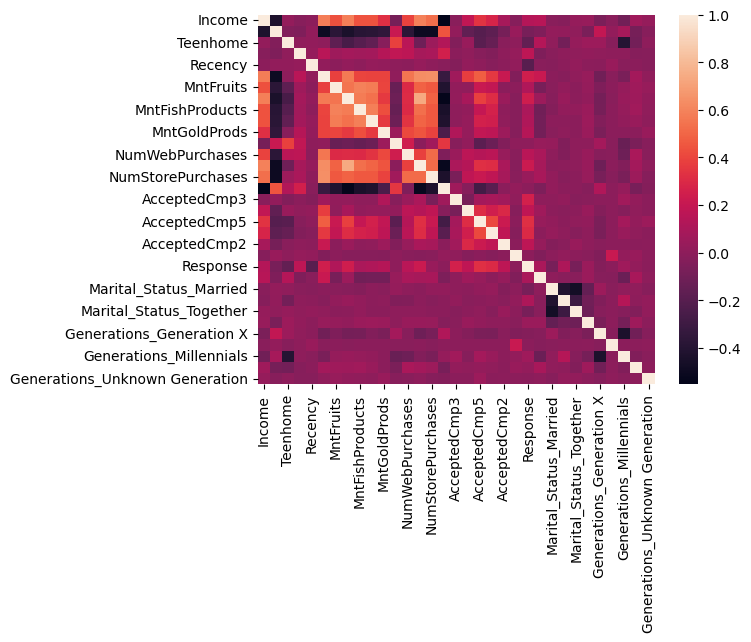

In [13]:
# Correlation matrix
corr_matrix = data6.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()


In [14]:
correlations = data6.corr() 


# Check correlations with the target variable
target_correlation = correlations[y_value].sort_values()

# Display correlations
print(target_correlation)

# Look for any feature with a perfect correlation
perfect_correlations = target_correlation[(target_correlation == 1) | (target_correlation == -1)]
print("Features perfectly correlated with Y:", perfect_correlations)

Recency                          -0.199766
Teenhome                         -0.153901
Marital_Status_Married           -0.079821
Kidhome                          -0.077909
Marital_Status_Together          -0.075293
Generations_Generation X         -0.036497
Generations_Unknown Generation   -0.012639
Generations_Lost Generation      -0.008935
NumWebVisitsMonth                -0.002209
Complain                         -0.002029
NumDealsPurchases                 0.003451
Generations_Silent Generation     0.019236
NumStorePurchases                 0.036241
Marital_Status_Widow              0.045656
Generations_Millennials           0.063313
Education                         0.099150
MntFishProducts                   0.108145
Marital_Status_Single             0.114126
MntSweetProducts                  0.116170
MntFruits                         0.122443
Income                            0.133047
MntGoldProds                      0.140332
NumWebPurchases                   0.151431
AcceptedCmp

# Everyone is important to themselves
all features will be perfect_correlations to themselves. They should never be near pefect with any other feature. the combination could create a bias in the results

# This section will address the data imbalance we see in our y value. 


In [15]:
print (data6.head())
print (data6.columns)


    Income  Kidhome  Teenhome  Dt_Customer  Recency  MntWines  MntFruits  \
0  58138.0        0         0           12       58       635         88   
1  46344.0        1         1           10       38        11          1   
2  71613.0        0         0           11       26       426         49   
3  26646.0        1         0           10       26        11          4   
4  58293.0        1         0           10       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education  \
0              546              172                88  ...        2.0   
1                6                2                 1  ...        2.0   
2              127              111                21  ...        2.0   
3               20               10                 3  ...        2.0   
4              118               46                27  ...        4.0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                     0.0  

In [16]:
y = data6[y_value]
# Checking the distribution of classes
class_distribution = y.value_counts()
print(class_distribution)
# Getting the percentage distribution of the classes
class_percentage = y.value_counts(normalize=True) * 100
print(class_percentage)

Response
0    1883
1     333
Name: count, dtype: int64
Response
0    84.972924
1    15.027076
Name: proportion, dtype: float64


In [17]:

X=data6.drop([y_value],axis=1)
y=data6[y_value]

In [18]:
#  Identify features with less that 1% importance and drop them
#  
model = RandomForestClassifier(n_estimators=60,random_state=42)
model.fit(X, y)

# Get feature importances and create a mask for dropping features
importances = model.feature_importances_
features_to_drop = importances < 0.03
# Drop features from DataFrame
X_reduced = X.loc[:, ~features_to_drop]

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_reduced.shape[1]}")
X=X_reduced

Original number of features: 32
Reduced number of features: 16


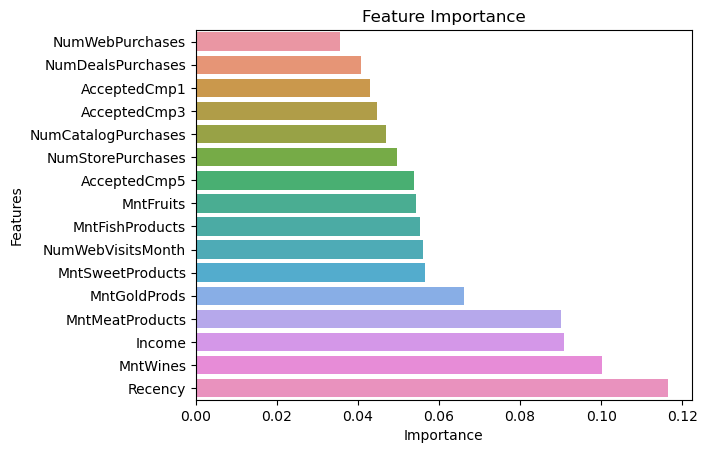

In [19]:
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Create a Series for easier plotting
feature_importance = pd.Series(importances, index=X.columns)

# Sorting importances
sorted_importances = feature_importance.sort_values()

# Creating a bar plot
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

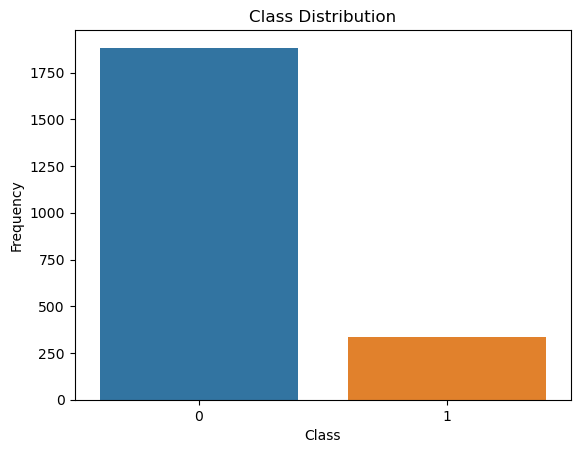

In [20]:
# Plotting the distribution of classes
sns.countplot(x=data6[y_value])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# life is balance in the fast lane

Using 

classification report for
- dataset with no changes
- dataset with underfit RandomUnderSampler
- dataset with overfit RandomOverSampler
- dataset with smote SMOTE
- dataset with smoteenn SMOTEENN

Scalers
- StandardScaler
- MinMaxScaler

Model
- RANDOM FOREST MODEL
- GradientBoostingClassifier
- KNeighborsClassifier
- SVM (Support Vector Machine)
- LogisticRegression
- Decision Tree Model


# Repeated Stratified K-Fold Cross-Validation 
Repeated Stratified K-Fold Cross-Validation Example
This project demonstrates the use of RepeatedStratifiedKFold from the scikit-learn library for evaluating a model's performance using cross-validation. This method is particularly useful for datasets with imbalanced classes and provides a more stable estimate of model accuracy by repeating the stratified cross-validation multiple times.

Overview
RepeatedStratifiedKFold extends the StratifiedKFold approach by repeating the stratified fold process multiple times, which helps in achieving a more generalized and robust model evaluation. It ensures that each class is evenly represented in each fold and reduces variance associated with a single trial of cross-validation.

Requirements
Python 3.8+
scikit-learn
Installation
To install the required packages, use the following pip command:

bash
Copy code
pip install scikit-learn
Usage
Run the model_evaluation.py script to evaluate the model using RepeatedStratifiedKFold cross-validation:

bash
Copy code
python model_evaluation.py
Example Code
Here is the example code that uses RepeatedStratifiedKFold with the SVM classifier on the Iris dataset:

python
Copy code
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = SVC()

# Setup cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Evaluate model
scores = cross_val_score(model, X, y, cv=cv)

print("Mean Accuracy: %0.2f" % scores.mean())
This script loads the Iris dataset, initializes an SVM classifier, and evaluates it using repeated stratified K-fold cross-validation. The results display the mean accuracy across all folds and repeats.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [22]:

# List of classifiers
classifiers = [
    ('RFC', RandomForestClassifier(random_state=42)),
    ('GBC', GradientBoostingClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVC', SVC(random_state=42)),
    ('LR',  LogisticRegression()),
    ('DTC', DecisionTreeClassifier(random_state=42))
]

# List of scalers
scalers = [
    ('SS', StandardScaler()),
    ('MMS', MinMaxScaler())
]

# List of resampling methods
samplers = [
    ('RUS', RandomUnderSampler(random_state=42)),
    ('ROS', RandomOverSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
    ('SMOTEENN', SMOTEENN(random_state=42)),
    ('ADASYN' , ADASYN(random_state=42))
]

# Evaluating each combination of sampler, scaler, and classifier
results = []
for sampler_name, sampler in samplers:
    for scaler_name, scaler in scalers:
        for classifier_name, classifier in classifiers:
            pipeline = make_imbalance_pipeline(sampler, scaler, classifier)
            cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
            scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
            results.append((sampler_name, scaler_name, classifier_name, scores.mean()))

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Sampler', 'Scaler', 'Classifier', 'Accuracy'])
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)
print (f'The top 5 models by are:\n')
print(sorted_results_df.head().to_string(index=False))



The top 5 models by are:

Sampler Scaler Classifier  Accuracy
    ROS     SS        RFC  0.873502
    ROS    MMS        RFC  0.873243
    ROS    MMS        GBC  0.838810
    ROS     SS        GBC  0.838810
  SMOTE     SS        RFC  0.828693


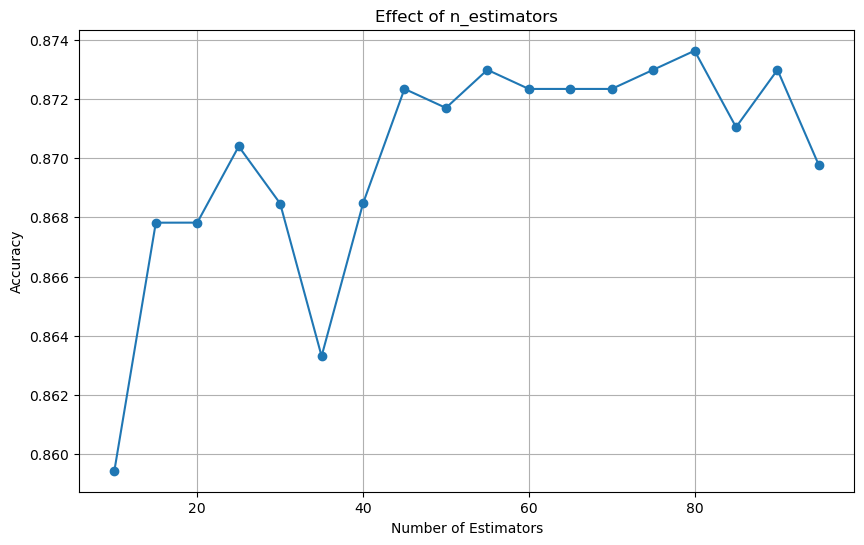

In [23]:
# Using the top model by accuracy score fid the best n_estimator
scores = []
estimators_range = range(10, 100, 5)  # From 10 to 300 in steps of 20

for n in estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    scores.append(np.mean(score))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators')
plt.grid(True)
plt.show()

# n_estimator
Using Cross Val Score We found that an N_estimator value of 105 would optimize our Random Forest Classifier

In [24]:
model = RandomForestClassifier(n_estimators=80,random_state=42)
model.fit(X_train, y_train)  # Ensure X and y are your feature matrix and target vector respectively
importance = model.feature_importances_

# Correct printing method
for i, v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i, v))

from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10)
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"\n{X_train.columns[i]}: {result.importances_mean[i]:.3f} +/- {result.importances_std[i]:.3f}")

Feature: 0, Score: 0.09295
Feature: 1, Score: 0.11180
Feature: 2, Score: 0.09269
Feature: 3, Score: 0.05123
Feature: 4, Score: 0.08678
Feature: 5, Score: 0.05215
Feature: 6, Score: 0.05473
Feature: 7, Score: 0.06800
Feature: 8, Score: 0.03623
Feature: 9, Score: 0.03723
Feature: 10, Score: 0.05576
Feature: 11, Score: 0.04771
Feature: 12, Score: 0.06533
Feature: 13, Score: 0.04007
Feature: 14, Score: 0.05833
Feature: 15, Score: 0.04899

Recency: 0.018 +/- 0.005

AcceptedCmp3: 0.008 +/- 0.002

AcceptedCmp1: 0.006 +/- 0.002


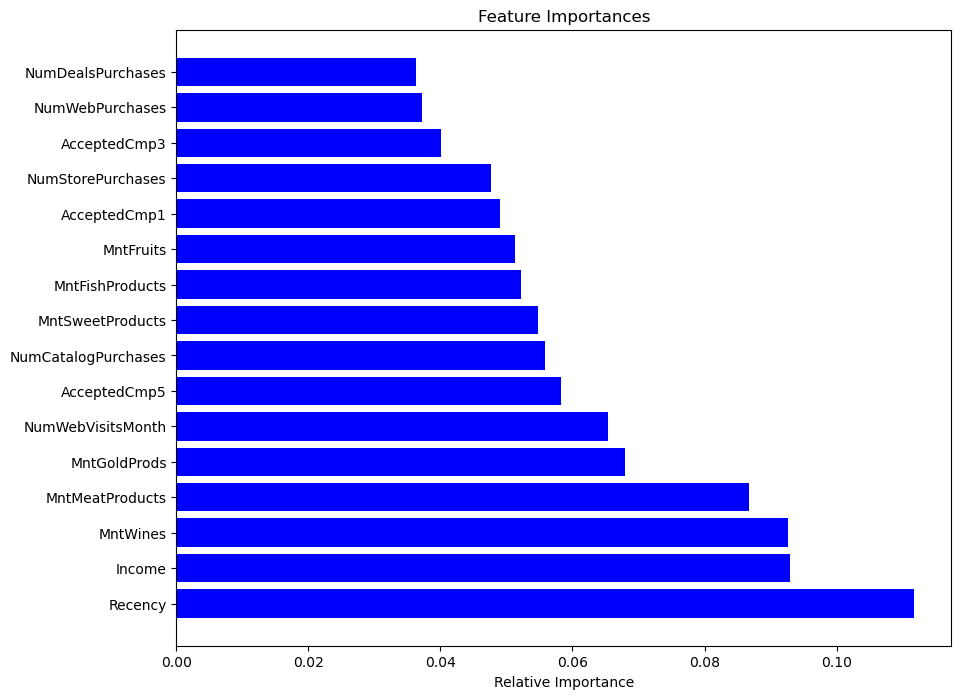

In [25]:
# Extract feature importances and sort them
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns  # Assuming your training data is a DataFrame

# Create a plot
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Applying PCA on Training Data
When using PCA (Principal Component Analysis) in a machine learning workflow, it's crucial to apply the PCA only to the training data (X_train). This approach prevents data leakage and ensures the integrity of model validation.

Why Use X_train Only
Prevent Data Leakage: By fitting PCA on X_train, you avoid using any knowledge from the test set (X_test) during model training. This maintains the validity of your model evaluation because the test set should mimic completely new, unseen data.

Maintain Validation Integrity: Transformations like PCA should only utilize historical (training) data to simulate a real-world scenario where only past information is available for decision-making.

In [26]:
# Initialize PCA with 10 components and fit on the training data
pca_model = PCA(n_components=10).fit(X_train)

# Transform the training and testing data using the fitted PCA
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

# Convert transformed arrays to DataFrame for better handling and visualization
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

# Display the first few rows of the transformed data
print("PCA Transformed Training Data:")
print(X_train_pca_df.head())
print("PCA Transformed Test Data:")
print(X_test_pca_df.head())

mc.plot_pca_results(X_train_pca_df, X_test_pca_df)

PCA Transformed Training Data:
            PC1         PC2         PC3        PC4         PC5        PC6  \
0 -18472.692226  152.507764   16.180076  19.547016   -7.551015  -6.781313   
1   2690.635193   61.860963   85.138858  33.929754    6.620008   0.803270   
2  -3281.880207  232.401674   49.368967  34.642526   -7.344081  -3.325296   
3  24163.487601  132.665262 -228.911948 -39.147988  114.280347  23.690683   
4 -37550.316021   35.499520  -28.152466   0.740950   -7.188857  -5.238550   

         PC7        PC8       PC9      PC10  
0   2.136893  -0.802774 -2.788476 -1.331702  
1 -24.045284   1.947270  3.199851  1.505842  
2 -14.513934  -4.294178 -2.664881 -3.517923  
3 -44.052850  12.711070 -1.199454 -5.988021  
4  -3.918540   1.031145 -2.060897 -0.686603  
PCA Transformed Test Data:
            PC1         PC2         PC3        PC4        PC5       PC6  \
0    130.846918 -127.670665  196.929765  19.729489  15.103747 -7.871982   
1 -18148.985142  191.361171   10.326915  24.957247  -

NameError: name 'plt' is not defined

In [ ]:
# Split the original data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Address imbalance with RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Scale the data (after resampling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data based on training scaler

# Train and evaluate the model
# model = RandomForestClassifier(n_estimators=80, random_state=42)
# model.fit(X_train_scaled, y_train_resampled)  # Use the scaled and resampled training data
#y_pred = model.predict(X_test_scaled)  # Predict using the scaled test data
# print(classification_report(y_test, y_pred))

# no sampling or scaling
# Train and evaluate the model
model = RandomForestClassifier(n_estimators=80, random_state=42)
model.fit(X_train, y_train)  # Use the scaled and resampled training data
y_pred = model.predict(X_test)  # Predict using the scaled test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       569
           1       0.58      0.34      0.43        96

    accuracy                           0.87       665
   macro avg       0.74      0.65      0.68       665
weighted avg       0.85      0.87      0.85       665



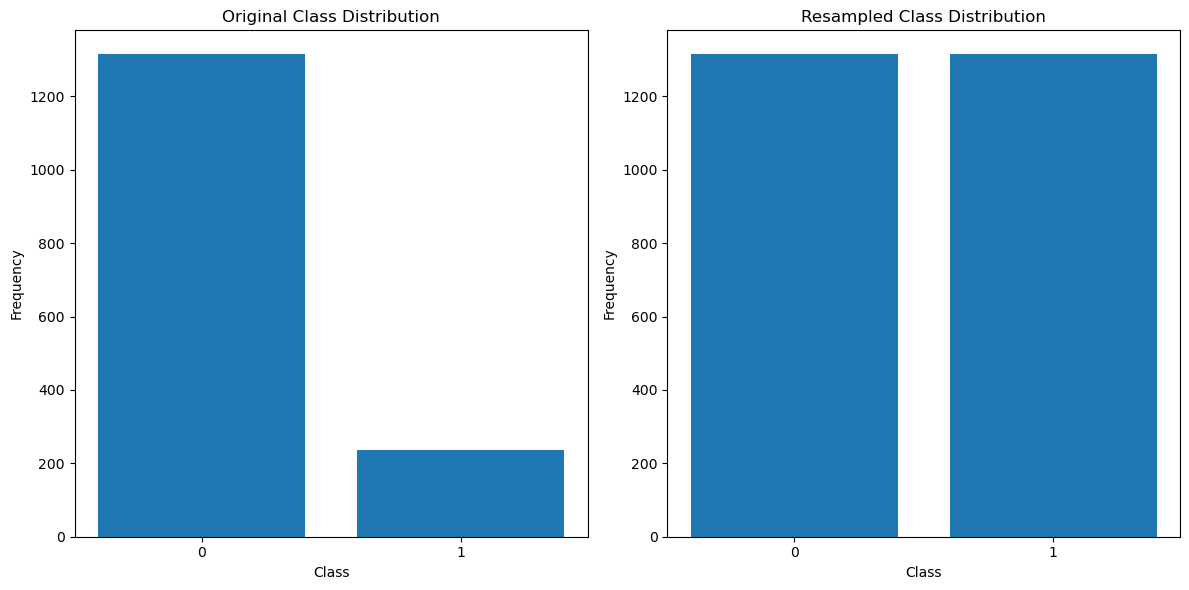

In [ ]:


# Original class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=np.arange(min(y_train), max(y_train) + 1.5) - 0.5, rwidth=0.8)
plt.title('Original Class Distribution')
plt.xticks(np.unique(y_train))
plt.xlabel('Class')
plt.ylabel('Frequency')

# Class distribution after resampling
plt.subplot(1, 2, 2)
plt.hist(y_train_resampled, bins=np.arange(min(y_train_resampled), max(y_train_resampled) + 1.5) - 0.5, rwidth=0.8)
plt.title('Resampled Class Distribution')
plt.xticks(np.unique(y_train_resampled))
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


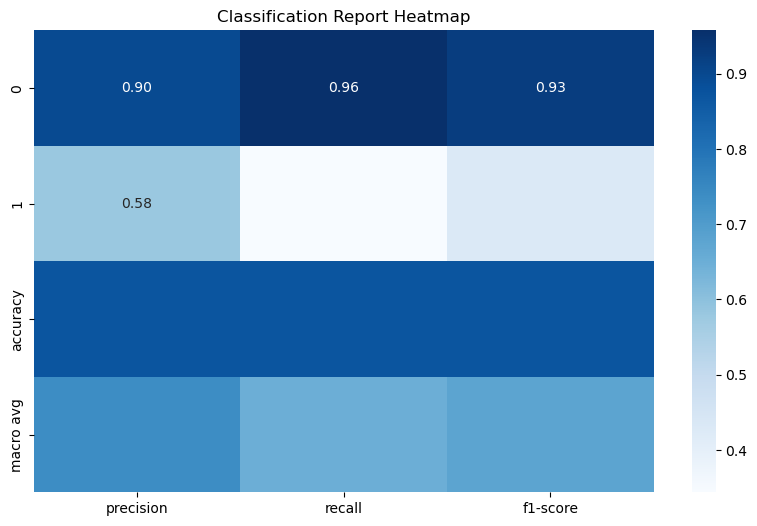

In [ ]:

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].drop(columns='support'), annot=True, fmt=".2f", cmap="Blues")
plt.title('Classification Report Heatmap')
plt.show()


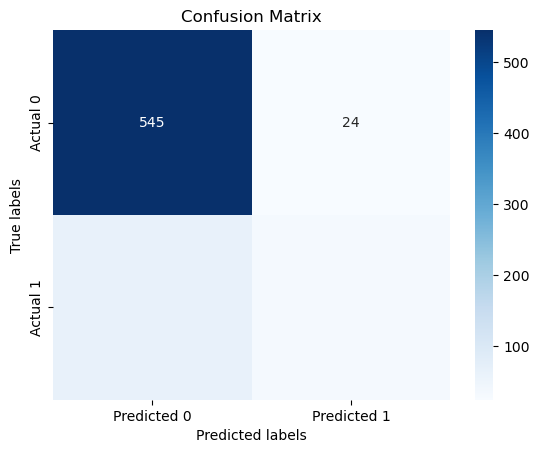

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


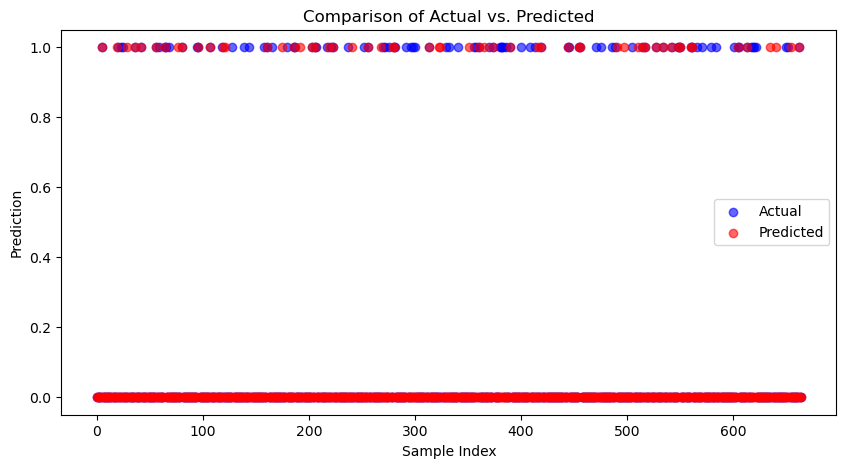

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Comparison of Actual vs. Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Prediction')
plt.legend()
plt.show()


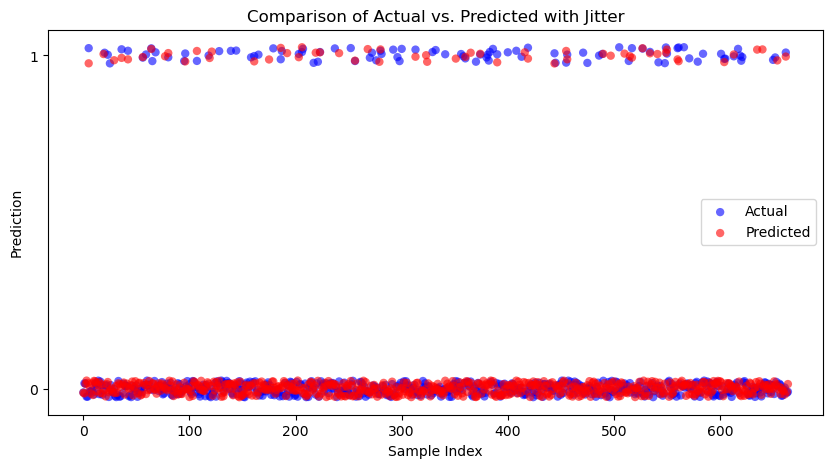

In [ ]:
# Adding a small amount of random noise to the y-values
jitter_y_test = y_test + 0.05 * np.random.rand(len(y_test)) - 0.025
jitter_y_pred = y_pred + 0.05 * np.random.rand(len(y_pred)) - 0.025

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), jitter_y_test, color='blue', label='Actual', alpha=0.6, edgecolor='none')
plt.scatter(range(len(y_pred)), jitter_y_pred, color='red', label='Predicted', alpha=0.6, edgecolor='none')
plt.title('Comparison of Actual vs. Predicted with Jitter')
plt.xlabel('Sample Index')
plt.ylabel('Prediction')
plt.yticks([0, 1])
plt.legend()
plt.show()

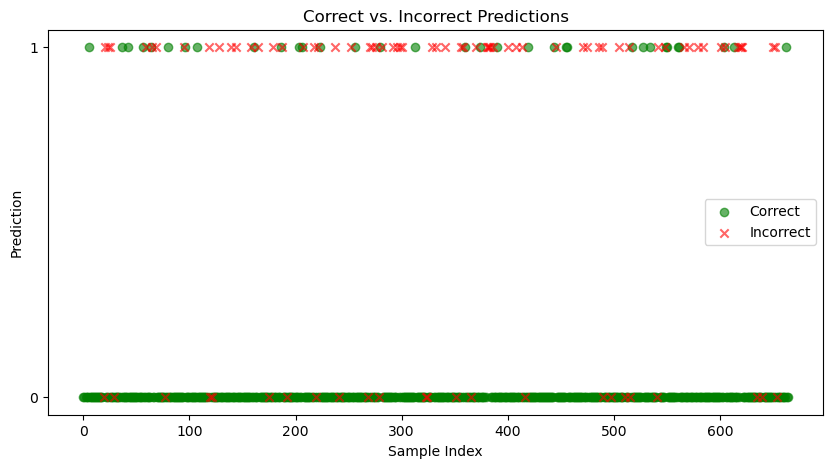

In [ ]:
# Determine correct and incorrect predictions
correct = y_test == y_pred
incorrect = ~correct

plt.figure(figsize=(10, 5))
# Correct predictions
plt.scatter(np.where(correct)[0], y_test[correct], color='green', marker='o', label='Correct', alpha=0.6)
# Incorrect predictions
plt.scatter(np.where(incorrect)[0], y_test[incorrect], color='red', marker='x', label='Incorrect', alpha=0.6)
plt.title('Correct vs. Incorrect Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Prediction')
plt.yticks([0, 1])
plt.legend()
plt.show()


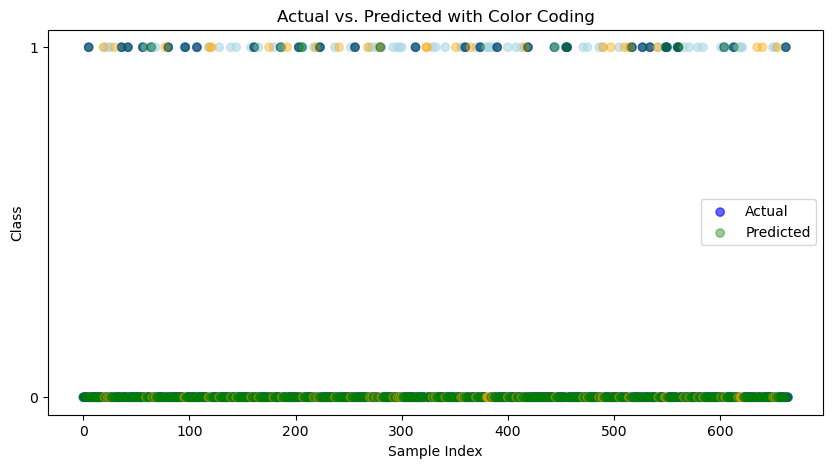

In [ ]:
plt.figure(figsize=(10, 5))
# Plotting actual values
plt.scatter(range(len(y_test)), y_test, c=['blue' if x else 'lightblue' for x in correct], label='Actual', alpha=0.6)
# Plotting predicted values
plt.scatter(range(len(y_pred)), y_pred, c=['green' if x else 'orange' for x in correct], label='Predicted', alpha=0.4)
plt.title('Actual vs. Predicted with Color Coding')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks([0, 1])
plt.legend()
plt.show()


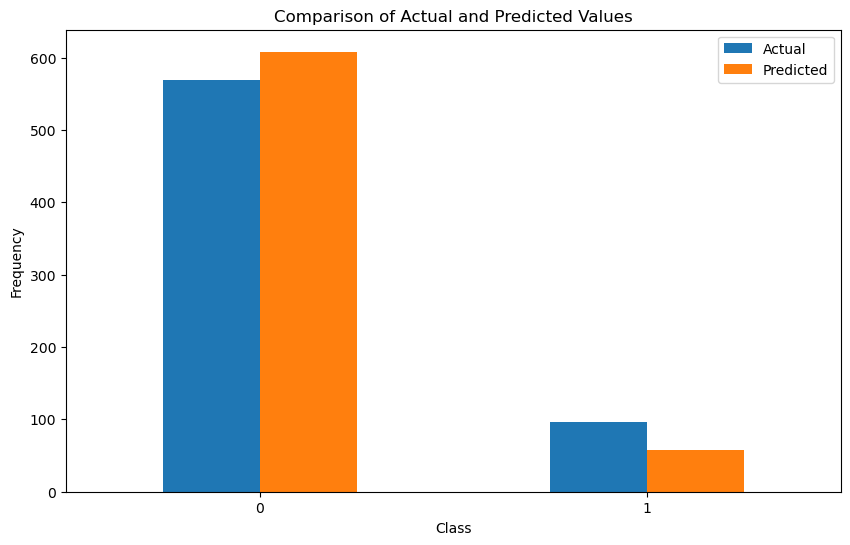

In [ ]:
# Assuming y_test and y_pred are your actual and predicted values respectively
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Count frequencies of each class
comparison_counts = df_comparison.apply(pd.Series.value_counts)

# Create a bar plot
comparison_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()